<h1>Titanic Survival: Complete EDA </h1>



The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

About This Kernel

This kernel is designed as a beginner-friendly yet structured walkthrough of the Titanic dataset. Instead of focusing on leaderboard optimization, the primary goal is to build strong fundamentals in:

- Exploratory Data Analysis (EDA)

- Data cleaning and preprocessing

- Building and evaluating a baseline machine learning model

- Understanding why a model performs the way it does



<h3>Importing libraries and loading data</h3>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

print("\nTrain data:")
train.head(10)



Train data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#Checking the dataset propeties

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.shape

(891, 12)

In [8]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
#Checking for null values in any variables
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>Checking missing values using heatmap</h3>

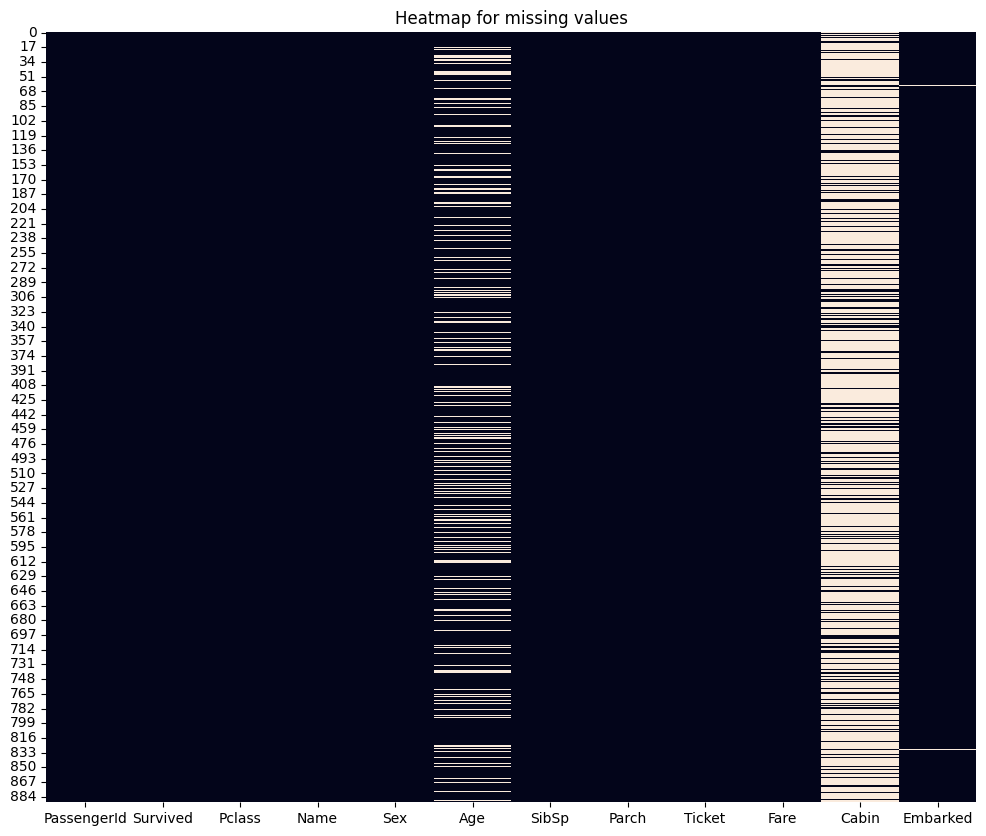

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(train.isnull(),cbar = False)
plt.title('Heatmap for missing values')
plt.show()

We can see that the Age values are missing for a lot of people, the cabin variable also shows a lot of missing values

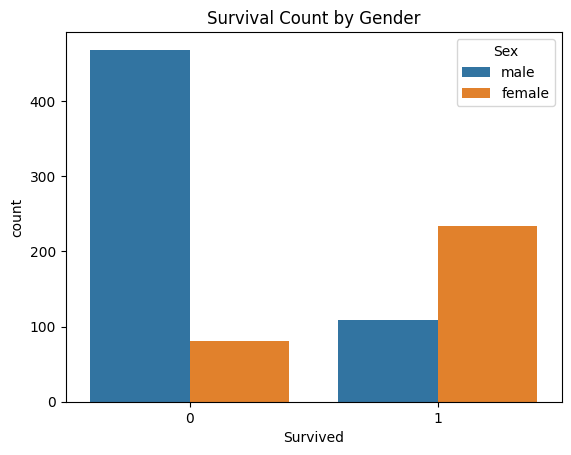

In [11]:
sns.countplot(x='Survived', hue ='Sex', data=train)
plt.title("Survival Count by Gender")
plt.show()

We can see from the plot that Women had a much larger survival rate

<h3>Plotting graph for passenger survival according to Passenger Class</h3>

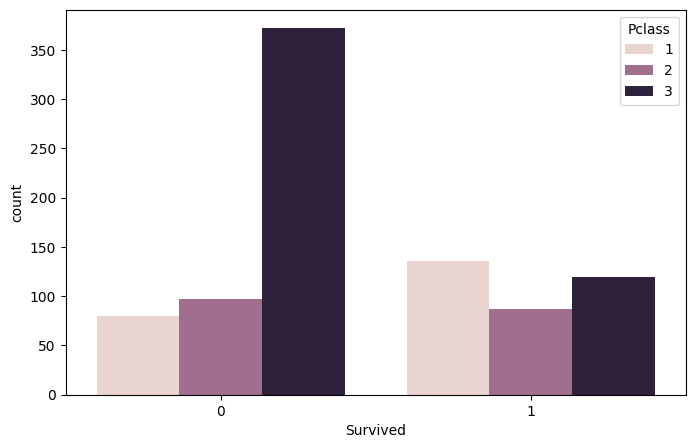

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x="Survived", hue = "Pclass", data= train)
plt.show()

We can see from the plot that First-class passenger had more chance or survival whilel third class passenger had really low chance for survival conpared to 1st and 2nd class

<h3>Finding out age distribution of passenger that had highest & lowest chance of survival</h3>

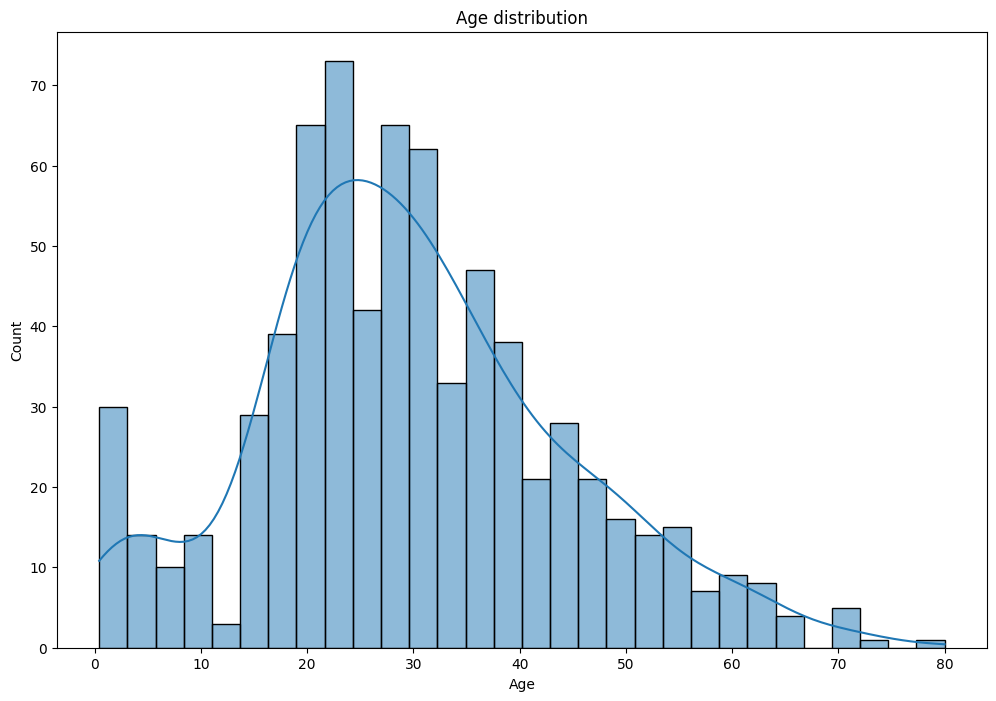

In [13]:
plt.figure(figsize=(12,8))
sns.histplot(train['Age'],bins=30,kde=True)
plt.title("Age distribution")
plt.show()


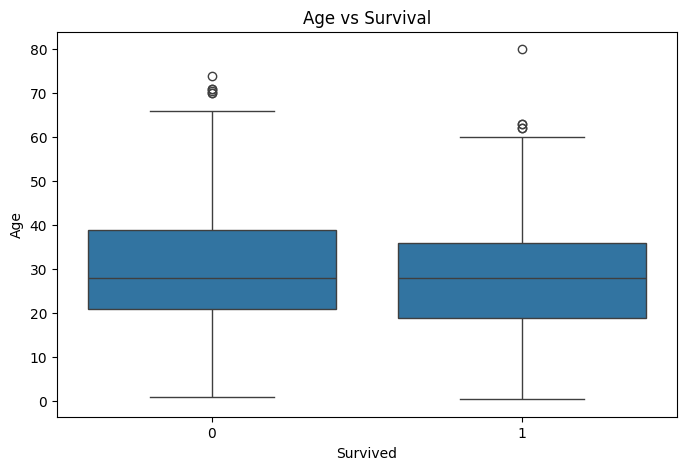

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y ="Age", data = train)
plt.title("Age vs Survival")
plt.show()

From both the plots we can see that Childrend and young passenger were more likely to survive

<h3>Cleaning, Grouping the variables for model making and training</h3>

In [15]:
train.drop(["Cabin","Name","Ticket","PassengerId"],axis = 1, inplace = True)

In [16]:
train["Age"]= train["Age"].fillna(train["Age"].median())

In [17]:
train["Embarked"]= train["Embarked"].fillna(train["Age"].mode())

In [18]:
train = pd.get_dummies(train, columns=["Sex","Embarked"],drop_first=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [19]:
X= train.drop("Survived", axis =1)
y= train["Survived"]

X_train, X_val, y_train, y_val= train_test_split(
    X,y,test_size=0.2, random_state=42
)

Logistic regression is used because: 
- Its simple
- Interpretable
- Good for binary classiication

<h2>Creating Logistic regression model</h2>

In [20]:
model = LogisticRegression(max_iter=1600)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1600)

<h2>Preicting and finding model accuracy</h2>

In [21]:
y_pred = model.predict(X_val)

accuracy_score(y_val, y_pred)

0.8100558659217877

<h2>Plotting confusion matrix for the model</h2>

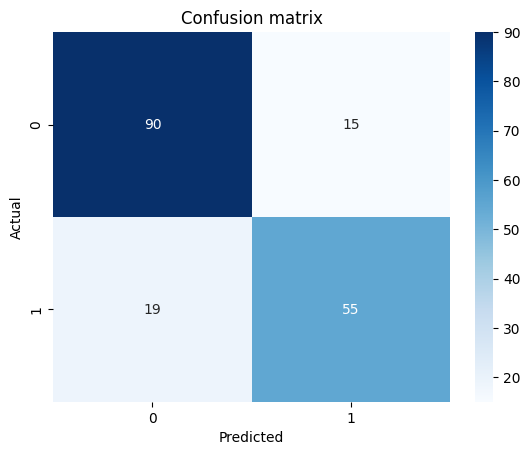

In [23]:
cm= confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot= True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [24]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



We can see that thee precision of death recorded are more ~83% their f1 score is also  greater.

<h1>===Here we conclude our analysis===</h1>